In [32]:
import sys
sys.path.append('/glade/u/home/jzweifel/utils')
from load_variable import load_variable_for_all_years
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
from cartopy import crs as ccrs, feature as cfeature

In [33]:
BURDENSO4   = load_variable_for_all_years('h3', 'BURDENSO4dn')   # kg m-2
FSNTOA      = load_variable_for_all_years('h0', 'FSNTOA')        # W m-2 (all-sky)
FSNTOA_d2   = load_variable_for_all_years('h0', 'FSNTOA_d2')     # W m-2 (clean-sky)
FSNTOAC     = load_variable_for_all_years('h0', 'FSNTOAC')       # W m-2 (clear-sky)
FSNTOAC_d2  = load_variable_for_all_years('h0', 'FSNTOAC_d2')    # W m-2 (clean&clear)

In [35]:
diff_BURDENSO4 = np.log10(BURDENSO4['2006']) - np.log10(BURDENSO4['1970'])
BURDENSO4_monthly = diff_BURDENSO4.groupby('time.month').mean().roll(month=-1)

direct_aerosol_forcing = (FSNTOA['2006'] - FSNTOA_d2['2006']) - (FSNTOA['1970'] - FSNTOA_d2['1970'])
direct_monthly = direct_aerosol_forcing.groupby('time.month').mean().roll(month=-1)

cloud_aerosol_forcing = (FSNTOA_d2['2006'] - FSNTOAC_d2['2006'])- (FSNTOA_d2['1970'] - FSNTOAC_d2['2006'])
cloud_monthly = cloud_aerosol_forcing.groupby('time.month').mean().roll(month=-1)

In [38]:
peak_months = [4, 5, 6]
min_months = [11, 12, 1]

BURDENSO4_max = BURDENSO4_monthly.sel(month=peak_months).mean('month')
BURDENSO4_min = BURDENSO4_monthly.sel(month=min_months).mean('month')
diff_BURDENSO4 = BURDENSO4_max - BURDENSO4_min

direct_max = direct_monthly.sel(month=peak_months).mean('month')
direct_min = direct_monthly.sel(month=min_months).mean('month')
diff_direct = direct_max - direct_min

cloud_max = cloud_monthly.sel(month=peak_months).mean('month')
cloud_min = cloud_monthly.sel(month=min_months).mean('month')
diff_cloud = cloud_max - cloud_min

lon = xr.open_dataarray('/glade/derecho/scratch/jzweifel/Regional_Masks_And_Area/dimension_files/model_dims/lon.nc')
lat = xr.open_dataarray('/glade/derecho/scratch/jzweifel/Regional_Masks_And_Area/dimension_files/model_dims/lat.nc')

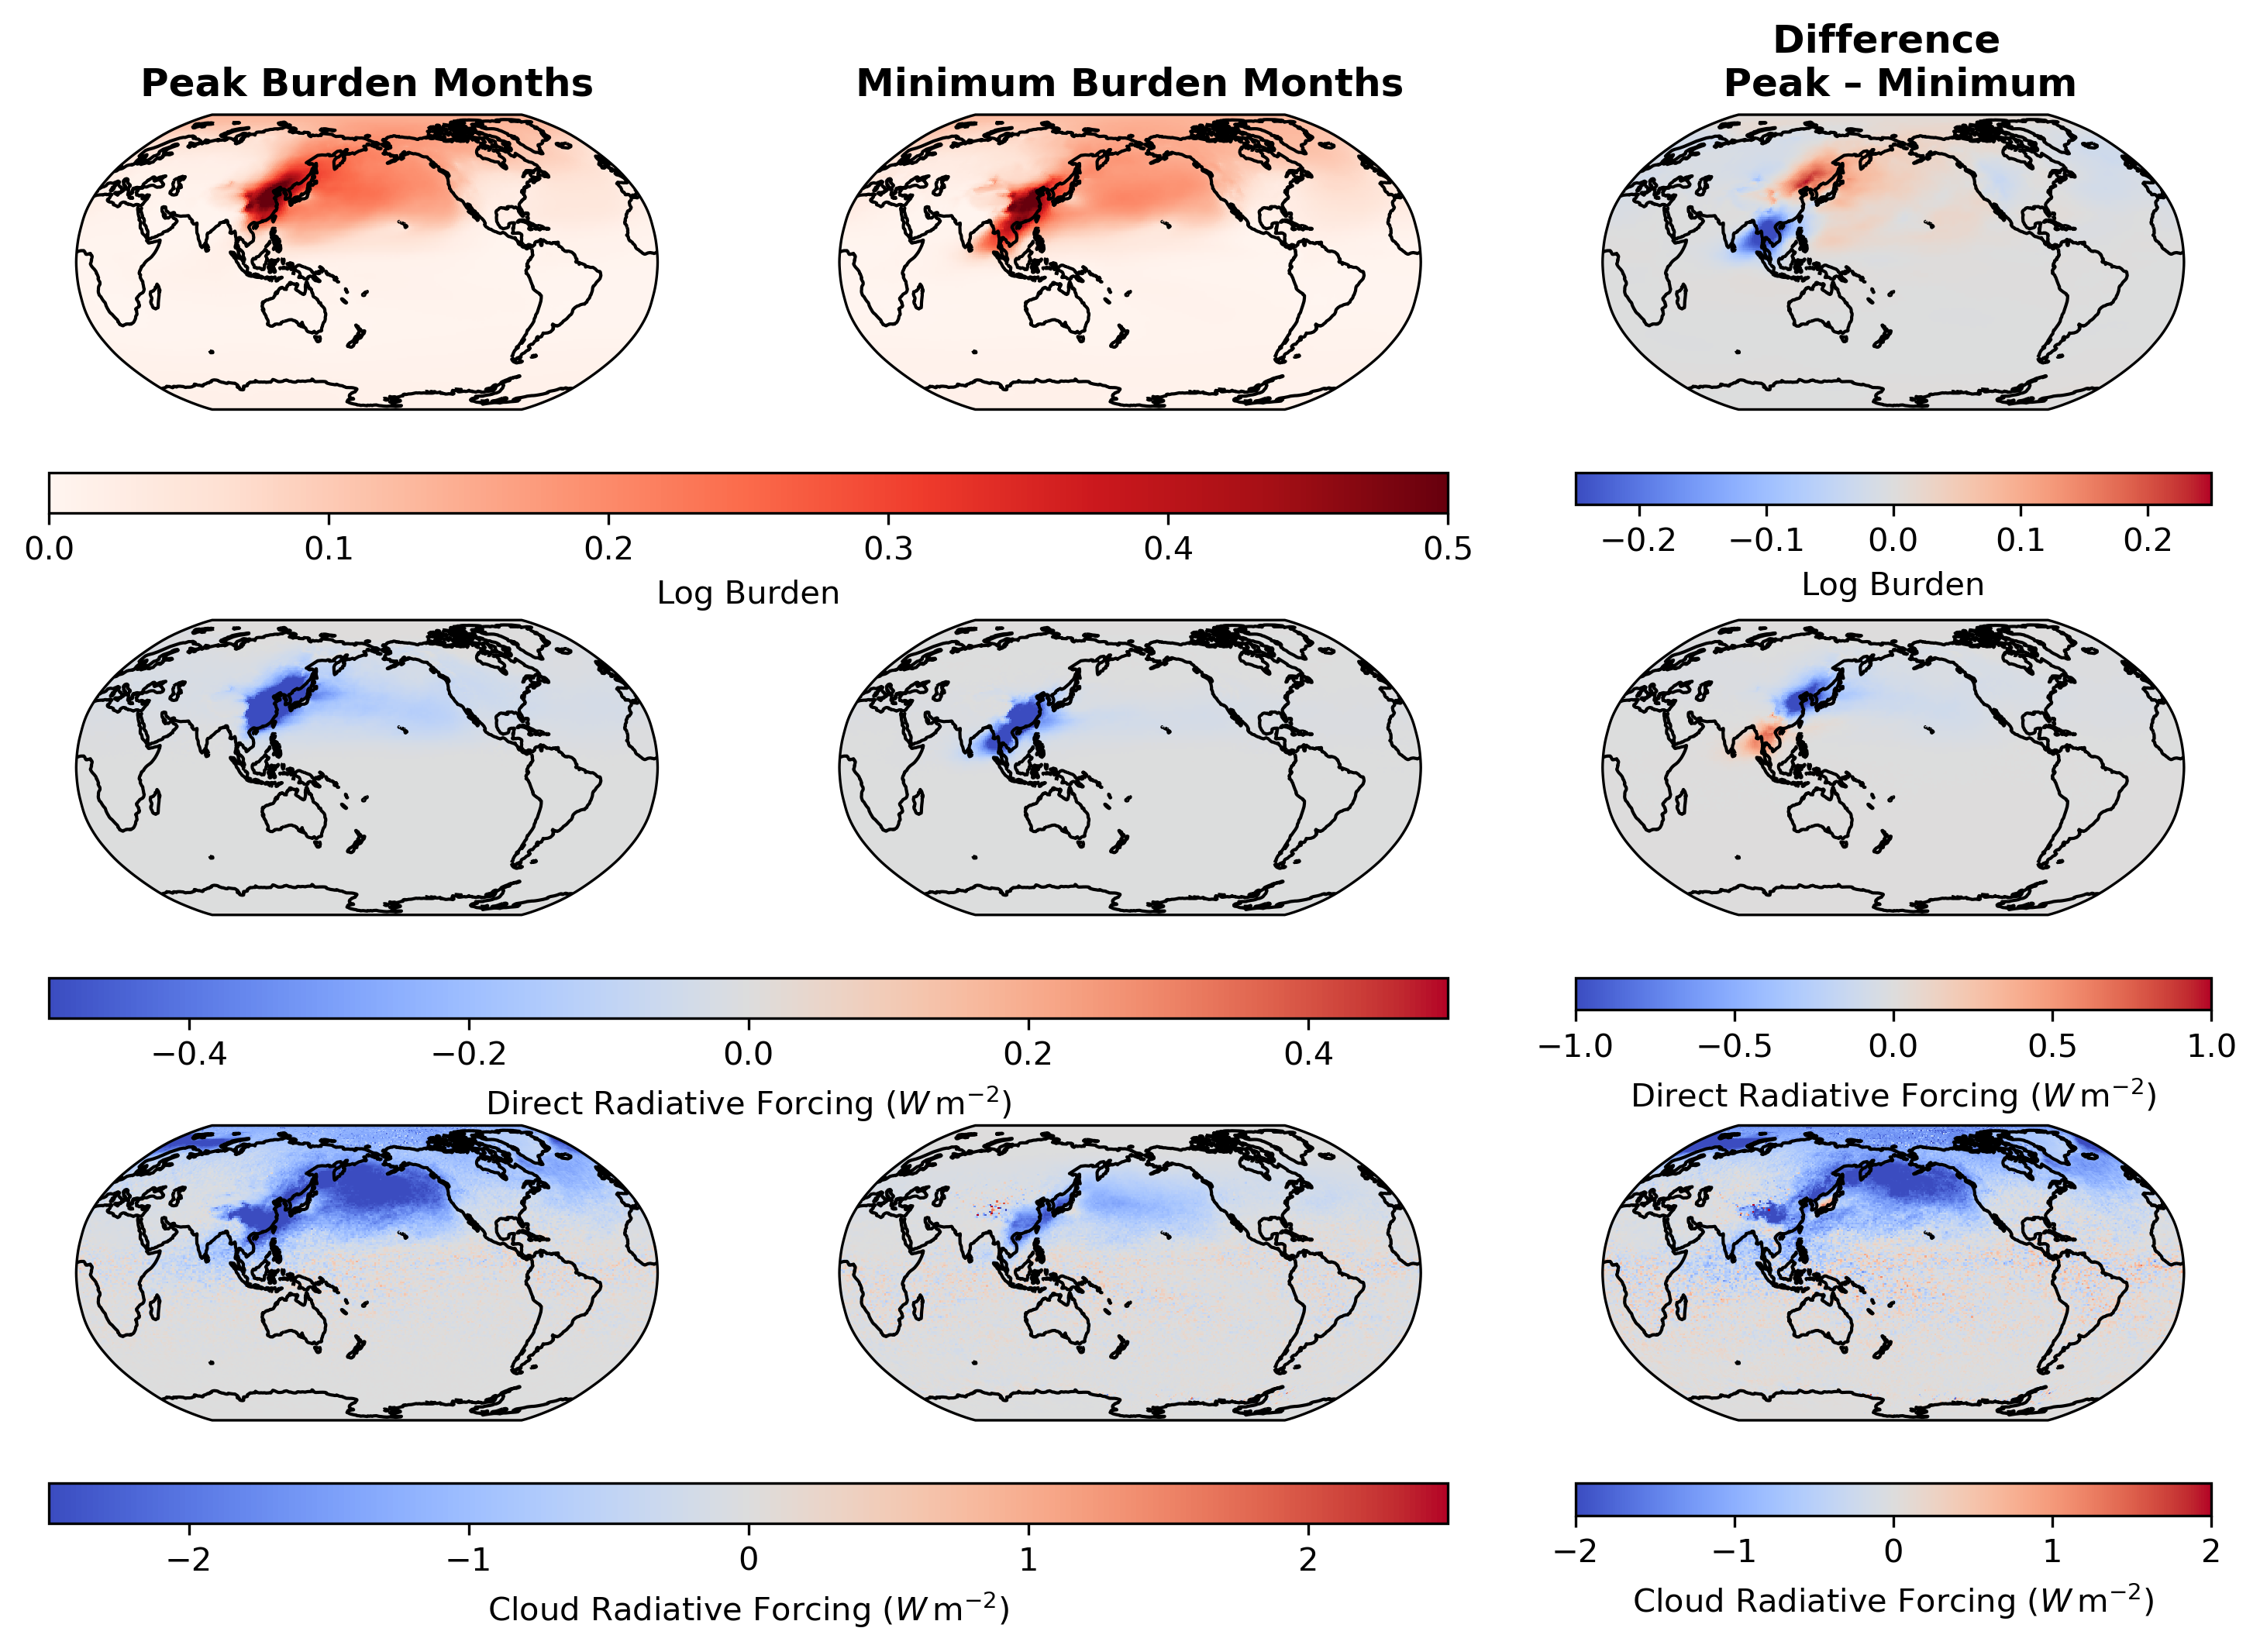

In [51]:
fig, axs = plt.subplots(3, 3, figsize=(12, 8), subplot_kw={'projection': ccrs.Robinson(central_longitude=180)}, dpi=300)
axs = axs.flatten()

# Plotting
m0 = axs[0].pcolormesh(lon, lat, BURDENSO4_max, transform=ccrs.PlateCarree(), vmin=0, vmax=0.5, cmap='Reds')
m1 = axs[1].pcolormesh(lon, lat, BURDENSO4_min, transform=ccrs.PlateCarree(), vmin=0, vmax=0.5, cmap='Reds')
m2 = axs[2].pcolormesh(lon, lat, diff_BURDENSO4, transform=ccrs.PlateCarree(), vmin=-0.25, vmax=0.25, cmap='coolwarm')

m3 = axs[3].pcolormesh(lon, lat, direct_max, transform=ccrs.PlateCarree(), vmin=-0.5, vmax=0.5, cmap='coolwarm')
m4 = axs[4].pcolormesh(lon, lat, direct_min, transform=ccrs.PlateCarree(), vmin=-0.5, vmax=0.5, cmap='coolwarm')
m5 = axs[5].pcolormesh(lon, lat, diff_direct, transform=ccrs.PlateCarree(), vmin=-1.0, vmax=1.0, cmap='coolwarm')

m6 = axs[6].pcolormesh(lon, lat, cloud_max, transform=ccrs.PlateCarree(), vmin=-2.5, vmax=2.5, cmap='coolwarm')
m7 = axs[7].pcolormesh(lon, lat, cloud_min, transform=ccrs.PlateCarree(), vmin=-2.5, vmax=2.5, cmap='coolwarm')
m8 = axs[8].pcolormesh(lon, lat, diff_cloud, transform=ccrs.PlateCarree(), vmin=-2.0, vmax=2.0, cmap='coolwarm')

# Add coastlines
for ax in axs:
    ax.add_feature(cfeature.COASTLINE)

# Column titles
axs[0].set_title("Peak Burden Months", fontsize=12, weight='bold')
axs[1].set_title("Minimum Burden Months", fontsize=12, weight='bold')
axs[2].set_title("Difference \n Peak – Minimum", fontsize=12, weight='bold')

# Colorbars
fig.colorbar(m0, aspect=35, pad=0.15, ax=[axs[0], axs[1]], orientation='horizontal', label='Log Burden')
fig.colorbar(m2, pad=0.15, ax=[axs[2]], orientation='horizontal',label='Log Burden')

fig.colorbar(m3, aspect=35, pad=0.15, ax=[axs[3], axs[4]], orientation='horizontal', label='Direct Radiative Forcing ($W\,\mathrm{m}^{-2}$)')
fig.colorbar(m5, pad=0.15, ax=[axs[5]], orientation='horizontal', label='Direct Radiative Forcing ($W\,\mathrm{m}^{-2}$)')

fig.colorbar(m6, aspect=35, pad=0.15, ax=[axs[6], axs[7]], orientation='horizontal', label='Cloud Radiative Forcing ($W\,\mathrm{m}^{-2}$)')
fig.colorbar(m8, pad=0.15, ax=[axs[8]], orientation='horizontal', label='Cloud Radiative Forcing ($W\,\mathrm{m}^{-2}$)')
